In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [5]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

#### 1.

In [11]:
lin_reg = linear_model.LinearRegression()

X_train = np.array(df["Ground Temperature"]).reshape(-1,1)
y_train = np.array(df["Chirps/Second"]).reshape(-1,1)

lin_reg.fit(X_train, y_train)

print lin_reg.intercept_
print lin_reg.coef_

[ 0.45931465]
[[ 0.20299973]]


The coefficients are $\hat{\beta}_0 = 0.45931465$ and $\hat{\beta}_1 = 0.20299973$.  Thus, the linear regresson equation is:

$$y = \hat{\beta}_0 + \hat{\beta}_1 x = 0.45931465 + 0.20299973x$$

#### 2.

Text(0,0.5,u'y = Chirps/Second')

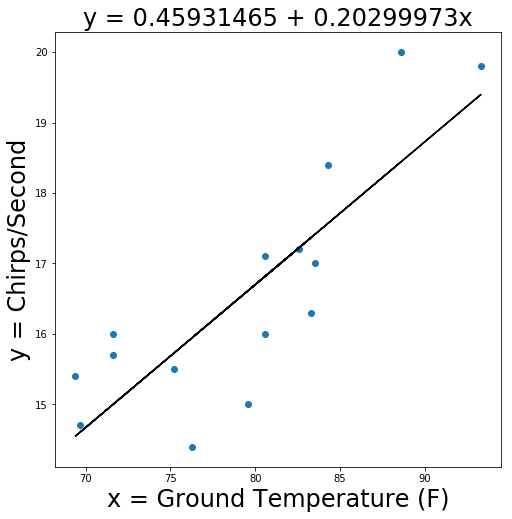

In [32]:
x_values = df["Ground Temperature"]
y_values = [0.45931465 + (0.20299973 * x) for x in x_values]

plt.figure(figsize=(8,8))
plt.scatter(X_train, y_train)
plt.plot(x_values, y_values, "#000000")
plt.title("y = 0.45931465 + 0.20299973x", fontsize = 24)
plt.xlabel("x = Ground Temperature (F)", fontsize = 24)
plt.ylabel("y = Chirps/Second", fontsize = 24)

#### 3.

In [36]:
print lin_reg.score(X_train, y_train)

0.692294652915


#### 4.

In [37]:
lin_reg.predict(95)

array([[ 19.74428913]])

#### 5.

In [38]:
(18 - 0.45931465)/0.20299973

86.40743192121488

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [39]:
df = pd.read_fwf("brain_body.txt")

#### 1.

In [46]:
X_train = np.array(df["Body"]).reshape(-1,1)
y_train = np.array(df["Brain"]).reshape(-1,1)

lin_reg = linear_model.LinearRegression()
lin_reg.fit(X_train, y_train)

print lin_reg.intercept_
print lin_reg.coef_

[-56.85554543]
[[ 0.90291295]]


The coefficients are $\hat{\beta}_0 = -56.85554543$ and $\hat{\beta}_1 = 0.90291295$.  Thus, the linear regresson equation is:

$$y = \hat{\beta}_0 + \hat{\beta}_1 x = -56.85554543 + 0.90291295x$$

#### 2.

Text(0,0.5,u'y = Brain weight')

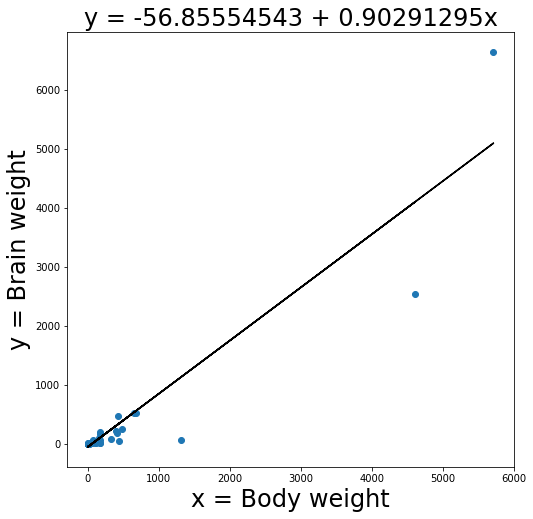

In [47]:
x_values = df["Body"]
y_values = [-56.85554543 + (0.90291295 * x) for x in x_values]

plt.figure(figsize=(8,8))
plt.scatter(X_train, y_train)
plt.plot(x_values, y_values, "#000000")
plt.title("y = -56.85554543 + 0.90291295x", fontsize = 24)
plt.xlabel("x = Body weight", fontsize = 24)
plt.ylabel("y = Brain weight", fontsize = 24)

#### 3.

In [48]:
print lin_reg.score(X_train, y_train)

0.872662084304


## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [49]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

#### 1.

In [55]:
X_train = df.loc[:, df.columns != "Salary"]
y_train = np.array(df["Salary"]).reshape(-1,1)

lin_reg = linear_model.LinearRegression()
lin_reg.fit(X_train, y_train)

print lin_reg.intercept_
print lin_reg.coef_

[ 11410.14654726]
[[ 1241.7924996   5586.18144952   482.85976783 -1331.64406341
   -128.79057354]]


The linear regression equation is:

$$y = 11410.14654726 + 1241.7924996x_{\text{Sex}} + 5586.18144952x_{\text{Rank}} + 482.85976783x_{\text{Year}} - 1331.64406341x_{\text{Degree}} - 128.79057354x_{\text{YSdeg}}$$

#### 2.

In [74]:
X_train = df[["Sex", "Rank", "Year", "Degree","YSdeg"]]
y_train = np.array(df["Salary"]).reshape(-1,1)

lin_reg = linear_model.LinearRegression()
lin_reg.fit(X_train, y_train)

lin_reg.score(X_train, y_train)

0.85471806744109713

Some factors affect the $R^2$ value more than others, but I still get the highest $R^2$ value from using all factors.

#### 3.

In [56]:
df[["Sex", "Salary"]].corr()

Sex    Salary
Sex     1.000000 -0.252782
Salary -0.252782  1.000000

Sex is not a significant factor in salary.

## Additional Questions

#### 1. What is the geometric interpretation of why ridge and lasso are different?  Why does this matter?  What happens to the parameters in each case?

The LASSO, or L1, regularization can be interpreted geometrically as a diamond, while ridge, or L2, regularization can be interpreted as a circle.  The lack of vertices in ridge regularization means it can't zero out any coefficients, so you can only use all or none of them.  In either case, large parameters "shrink" as a result of regularization.

#### 2. Implement Linear Regression (ols; any way you like). Fit random data, and plot your model’s best fit line and dataset.  Would you ever use gradient descent to solve this problem?

In [15]:
X_train = abs(np.random.randn(50,1))
y_train = 2.1*np.random.randn(50,1) + 4.2

lin_reg = linear_model.LinearRegression()
lin_reg.fit(X_train, y_train)

print lin_reg.intercept_
print lin_reg.coef_

[ 4.13184359]
[[ 0.33954179]]


Text(0,0.5,u'y')

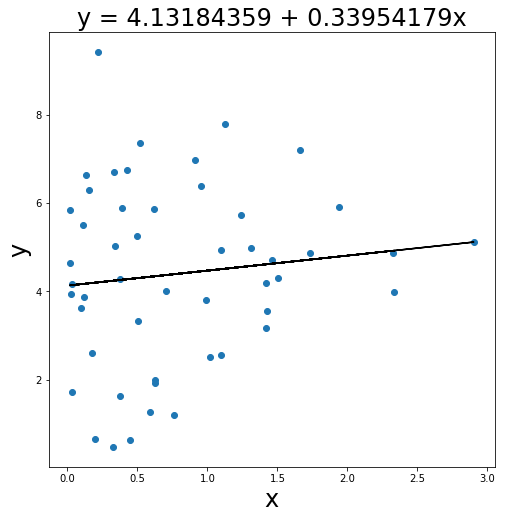

In [17]:
x_values = list(X_train)
y_values = [4.13184359 + (0.33954179 * x) for x in x_values]

plt.figure(figsize=(8,8))
plt.scatter(X_train, y_train)
plt.plot(x_values, y_values, "#000000")
plt.title("y = 4.13184359 + 0.33954179x", fontsize = 24)
plt.xlabel("x", fontsize = 24)
plt.ylabel("y", fontsize = 24)

In this case, one might, because there is only one variable.  In this case it would probably be cheap and fast to compute.